# Makre sure to run in env: online_reviews_analysis_env

In [1]:
!conda env list

# conda environments:
#
                         C:\Program Files\Orange
base                     C:\ProgramData\Anaconda3
AutoCoder                C:\Users\PhillipRashaad\.conda\envs\AutoCoder
ChatDev_conda_env        C:\Users\PhillipRashaad\.conda\envs\ChatDev_conda_env
PandasProfileEnv         C:\Users\PhillipRashaad\.conda\envs\PandasProfileEnv
SMOP_env                 C:\Users\PhillipRashaad\.conda\envs\SMOP_env
autogen_autobuild_env     C:\Users\PhillipRashaad\.conda\envs\autogen_autobuild_env
autogen_studio_env       C:\Users\PhillipRashaad\.conda\envs\autogen_studio_env
automemgpt_env           C:\Users\PhillipRashaad\.conda\envs\automemgpt_env
classy_env               C:\Users\PhillipRashaad\.conda\envs\classy_env
crewai_env               C:\Users\PhillipRashaad\.conda\envs\crewai_env
crewai_job_search_env     C:\Users\PhillipRashaad\.conda\envs\crewai_job_search_env
crewai_newsletter_env     C:\Users\PhillipRashaad\.conda\envs\crewai_newsletter_env
crewai_poetry_env        C:

# LOAD LIBRARIES AND DATA

In [2]:
import streamlit as st
import pandas as pd
import plotly.express as px

In [4]:
# Load data
@st.cache_data
def load_data():
    '''Load the customer data'''
    df = pd.read_excel(r"03 - Updated_Synthetic_Merged_Data_with_Additional_Columns.xlsx")
    return df

df = load_data()

print(df.shape)

df.head()

(1379, 18)


,Customer_ID_Demo,Plan_Type,Gender,Age,Age_Group,State,State_Code,Region,Review_ID,Customer_ID_Reviews,Review_Date,Review_Year,Rating,Review_Text,Sentiment,Prompt,Company_Name,Topic
0,1,Individual and Family,Male,42,35 to 44,New Jersey,NJ,East,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Medicare,Male,68,65 to 69,Missouri,MO,South,308.0,2.0,2023-01-02,2023.0,2.0,I am extremely disappointed with Aetna's healt...,negative,Write a negative customer review for Aetna's h...,Aetna's health insurance service,Coverage
2,3,Medicare,Male,69,65 to 69,Georgia,GA,South,547.0,3.0,2022-01-25,2022.0,2.0,I am extremely dissatisfied with Aetna's healt...,negative,Write a negative customer review for Aetna's h...,Aetna's health insurance service,Preauthorization
3,4,Individual and Family,Other,46,45 to 54,Maryland,MD,East,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Individual and Family,Female,46,45 to 54,California,CA,West,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Customer_ID_Demo     1379 non-null   int64         
 1   Plan_Type            1379 non-null   object        
 2   Gender               1379 non-null   object        
 3   Age                  1379 non-null   int64         
 4   Age_Group            1379 non-null   object        
 5   State                1379 non-null   object        
 6   State_Code           1379 non-null   object        
 7   Region               1379 non-null   object        
 8   Review_ID            1000 non-null   float64       
 9   Customer_ID_Reviews  1000 non-null   float64       
 10  Review_Date          1000 non-null   datetime64[ns]
 11  Review_Year          1000 non-null   float64       
 12  Rating               1000 non-null   float64       
 13  Review_Text          1000 non-nul

# TUTORIAL
- YouTube Tutorial URL: https://www.youtube.com/watch?v=asFqpMDSPdM&t=1875s 
- GITHUB: https://github.com/dataprofessor/population-dashboard 
- App Demo: https://population-dashboard.streamlit.app/ 
- SLIDES: https://docs.google.com/presentation/d/10RLdtsqvtI6r9fD2ofIpsj6-TBaBJoVWyt_E0_bqgBE/edit#slide=id.g5fa7c72a2eeb0a1f_32 


### DASHBOARD SCREENSHOT
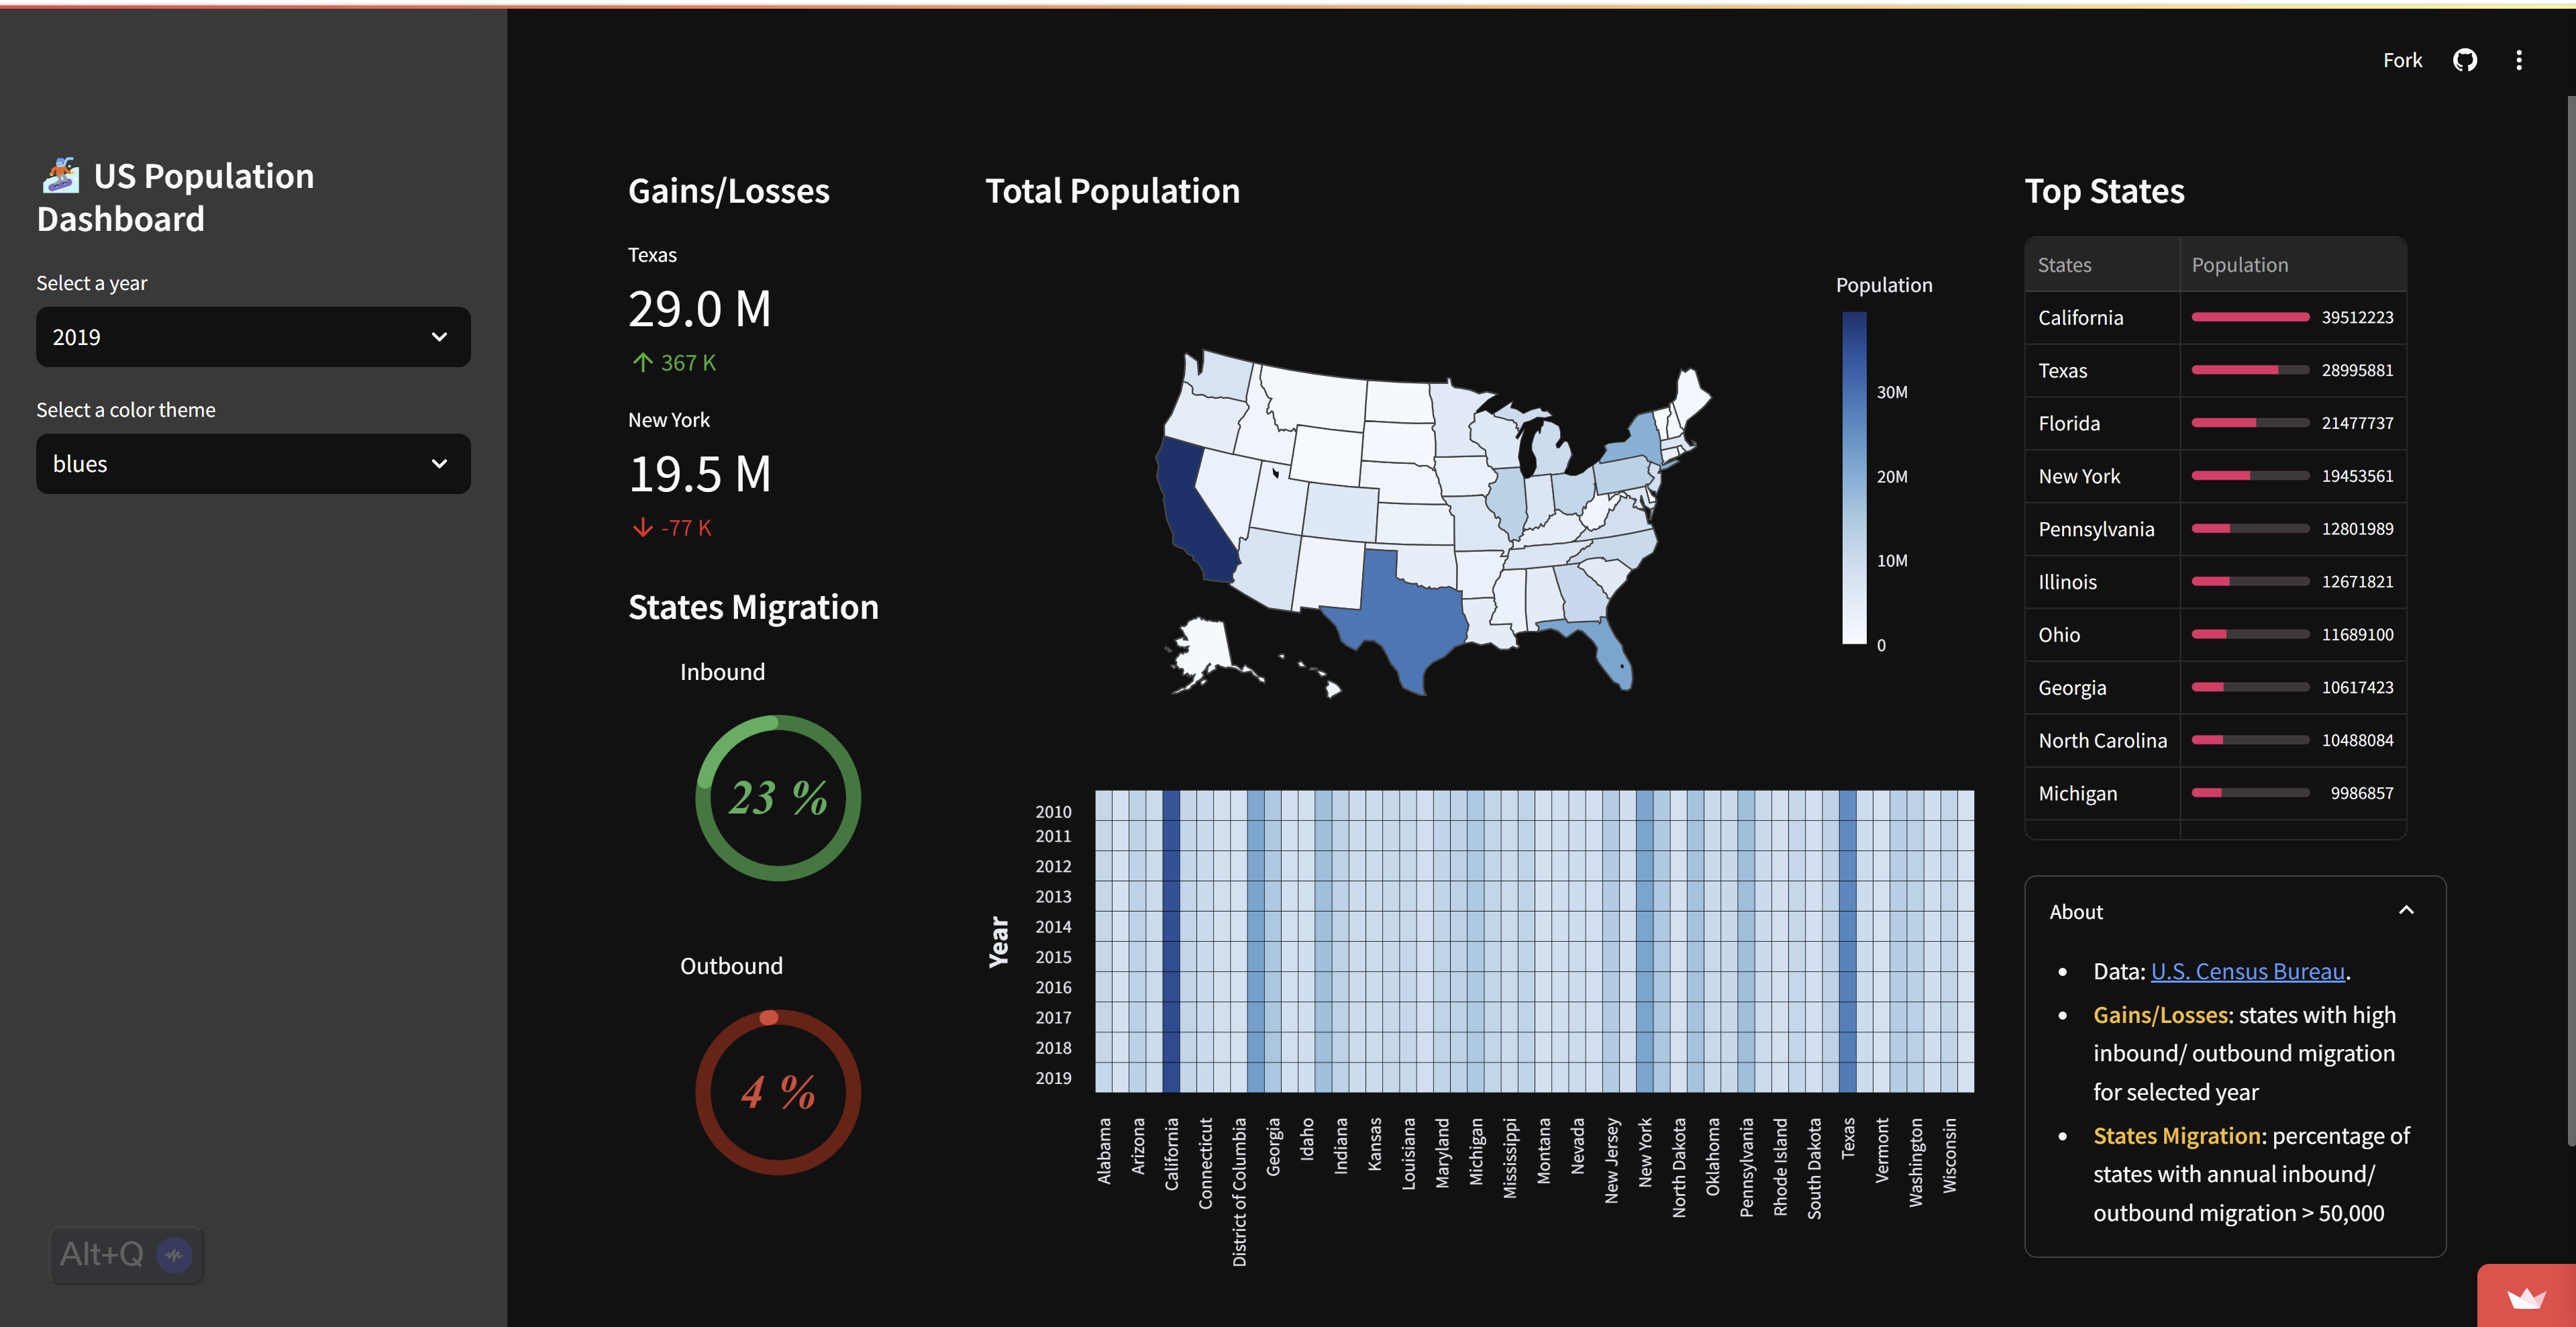

#######################
### Dashboard Main Panel LAYOUT
col = st.columns((1.5, 4.5, 2), gap='medium')

## PLOT LIBRARY DOCS:
- Plotly_Express: https://plotly.com/python-api-reference/plotly.express.html#px
- Plotly_Graph_Objects: https://plotly.com/python/indicator/#overview

## COLUMN 1 - PLOTS

1. **Current Year (CY) Avg Rating** - A metric scorecard that displays the Current Year average Ratings as an indicator value above a bar chart. The bar char has x-axis= Review_Year & y-axis= Avg Rating 
2. **Sentiment Pie Chart** -  
3. **Grouped Topics KPIs** - Highest Rated Topic, Lowest Rated Topic, & Most Popular Topic all grouped together

### 1. Indicator + Bar Chart: (CY) Avg Rating

In [6]:
import plotly.graph_objects as go

def create_year_over_year_avg_rating_chart(data):
    """
    Creates and displays a bar chart of year-over-year average ratings.

    Parameters:
    data (DataFrame): A pandas DataFrame containing the columns 'Review_Year' and 'Rating'.

    Returns:
    None
    """
    # Calculate the year-over-year average rating
    yearly_avg_rating = data.groupby('Review_Year')['Rating'].mean().reset_index()

    # Create a bar chart
    fig = go.Figure(data=[
        go.Bar(
            x=yearly_avg_rating['Review_Year'],
            y=yearly_avg_rating['Rating'],
            text=yearly_avg_rating['Rating'].round(2),
            textposition='auto'
        )
    ])

    # Update layout
    fig.update_layout(
        title='Year-over-Year Average Rating',
        xaxis_title='Year',
        yaxis_title='Average Rating',
        yaxis=dict(range=[0, 5]),
        template='plotly_white'
    )

    # Show the figure
    fig.show()

# Example usage:
# create_year_over_year_avg_rating_chart(data)


In [7]:
# Example usage:
create_year_over_year_avg_rating_chart(df)

In [43]:
import plotly.graph_objects as go

def create_year_over_year_avg_rating_chart_with_indicator(data):
    """
    Creates and displays a bar chart of year-over-year average ratings with an indicator for the most recent year.

    Parameters:
    data (DataFrame): A pandas DataFrame containing the columns 'Review_Year' and 'Rating'.

    Returns:
    None
    """
    # Calculate the year-over-year average rating
    yearly_avg_rating = data.groupby('Review_Year')['Rating'].mean().reset_index()

    # Get the most recent year and the prior year average ratings
    most_recent_year = yearly_avg_rating['Review_Year'].max()
    prior_year = most_recent_year - 1

    most_recent_avg_rating = yearly_avg_rating.loc[yearly_avg_rating['Review_Year'] == most_recent_year, 'Rating'].values[0]
    prior_year_avg_rating = yearly_avg_rating.loc[yearly_avg_rating['Review_Year'] == prior_year, 'Rating'].values[0]
    

    # Create a bar chart
    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=yearly_avg_rating['Review_Year'],
        y=yearly_avg_rating['Rating'],
        text=yearly_avg_rating['Rating'].round(2),
        textposition='auto'
    ))

    # Add the indicator
    fig.add_trace(go.Indicator(
        mode="number+delta",
        value=round(most_recent_avg_rating, 2),
        delta={'reference': prior_year_avg_rating, 'relative': True, 'position': "top", 'valueformat': ".2%"},
        title={"text": "CY Avg Rating"},
        domain={'x': [0.5, 0.5], 'y': [0.85, 1]},
        number={'font': {'size': 100}}
    ))

    # Update layout
    fig.update_layout(
        title='Year-over-Year Average Rating',
        xaxis_title='Year',
        yaxis_title='Average Rating',
        yaxis=dict(range=[0, 5]),
        template='plotly_white',
        height=800
    )

    # Show the figure
    fig.show()

# Example usage:
# create_year_over_year_avg_rating_chart_with_indicator(data)


In [44]:
# Example usage:
create_year_over_year_avg_rating_chart_with_indicator(df)



In [117]:
def create_year_over_year_avg_rating_chart_with_indicator(data):
    """
    Creates and displays a bar chart of year-over-year average ratings with an indicator for the most recent year.

    Parameters:
    data (DataFrame): A pandas DataFrame containing the columns 'Review_Year' and 'Rating'.

    Returns:
    None
    """
    # Calculate the year-over-year average rating
    yearly_avg_rating = data.groupby('Review_Year')['Rating'].mean().reset_index()

    # Get the most recent year and the prior year average ratings
    most_recent_year = yearly_avg_rating['Review_Year'].max()
    prior_year = most_recent_year - 1

    most_recent_avg_rating = yearly_avg_rating.loc[yearly_avg_rating['Review_Year'] == most_recent_year, 'Rating'].values[0]
    prior_year_avg_rating = yearly_avg_rating.loc[yearly_avg_rating['Review_Year'] == prior_year, 'Rating'].values[0]

    # Create a bar chart
    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=yearly_avg_rating['Review_Year'],
        y=yearly_avg_rating['Rating'],
        #text=yearly_avg_rating['Rating'].round(2),
        textposition='auto'
    ))

    # Add the indicator
    fig.add_trace(go.Indicator(
        mode="number+delta",
        value=round(most_recent_avg_rating, 2),
        delta={'reference': prior_year_avg_rating, 'relative': True, 'position': "top", 'valueformat': ".2%", 'font': {'size': 15}},
        title={"text": "CY Avg Rating"},
        domain={'x': [0.5, 0.5], 'y': [0.01, 1]},
        number={'font': {'size': 50}}
    ))

    # Update layout for KPI card size and style
    fig.update_layout(
        title=dict(text='YoY Avg Rating', font=dict(size=20), x=0.5, xanchor='center'),
        showlegend=False,  # Hide the legend to keep it clean
        margin=dict(l=20, r=20, t=50, b=20),  # Adjust margins to fit the card size
        height=200,  # Set a smaller height to fit a metric card
        width=300,  # Set a smaller width to fit a metric card
        template='plotly_white',
        yaxis=dict(range=[0, 5])  # Ensure the y-axis range is appropriate
    )

    return fig

In [118]:
# Example usage:
create_year_over_year_avg_rating_chart_with_indicator(df)



### 2. Sentiment Pie Chart

In [49]:
import plotly.graph_objects as go

def create_sentiment_donut_chart(data):
    """
    Creates and displays a donut pie chart showing the percentage split for the 'Sentiment' column based on review counts.

    Parameters:
    data (DataFrame): A pandas DataFrame containing the column 'Sentiment'.

    Returns:
    None
    """
    # Calculate the percentage split for 'Sentiment'
    sentiment_counts = data['Sentiment'].value_counts(normalize=True) * 100
    sentiment_labels = sentiment_counts.index
    sentiment_values = sentiment_counts.values

    # Define color mapping
    color_mapping = {'negative': 'red', 'neutral': 'yellow', 'positive': 'green'}
    sentiment_colors = [color_mapping[sentiment] for sentiment in sentiment_labels]

    # Create the donut pie chart
    fig = go.Figure(data=[go.Pie(
        labels=sentiment_labels,
        values=sentiment_values,
        hole=.4,
        marker=dict(colors=sentiment_colors)
    )])

    # Update layout
    fig.update_layout(
        title='Sentiment Percentage Split',
        annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=20, showarrow=False)]
    )

    # Show the figure
    fig.show()



In [50]:
# Example usage:
create_sentiment_donut_chart(df)



In [145]:
def create_sentiment_donut_chart(data):
    """
    Creates and displays a donut pie chart showing the percentage split for the 'Sentiment' column based on review counts.

    Parameters:
    data (DataFrame): A pandas DataFrame containing the column 'Sentiment'.

    Returns:
    Figure: A plotly Figure object
    """
    # Calculate the percentage split for 'Sentiment'
    sentiment_counts = data['Sentiment'].value_counts(normalize=True) * 100
    sentiment_labels = sentiment_counts.index
    sentiment_values = sentiment_counts.values

    # Define color mapping
    color_mapping = {'negative': 'red', 'neutral': 'yellow', 'positive': 'green'}
    sentiment_colors = [color_mapping[sentiment] for sentiment in sentiment_labels]

    # Create the donut pie chart
    fig = go.Figure(data=[go.Pie(
        labels=sentiment_labels,
        values=sentiment_values,
        hole=.5,  # Make the hole larger to emphasize the donut shape
        marker=dict(colors=sentiment_colors),
        textinfo='label+percent',  # Display both label and percentage
        textfont=dict(size=10),  # Adjust font size to fit inside the chart
        insidetextorientation='horizontal',  # Ensure text is horizontal
    )])

    # Update layout for KPI card size and style
    fig.update_layout(
        title=dict(text='Customer Sentiment', font=dict(size=20), x=0.5, xanchor='center', y=.9),
        annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=10, showarrow=False)],
        showlegend=False,  # Hide the legend to keep it clean
        margin=dict(l=10, r=10, t=40, b=10),  # Adjust margins to fit the card size
        height=200,  # Set a smaller height to fit a metric card
        width=300,  # Set a smaller width to fit a metric card
    )

    return fig

In [146]:
# Example usage:
create_sentiment_donut_chart(df)


### 3. Grouped Topics KPI

In [72]:
import plotly.graph_objects as go
import pandas as pd

def create_highest_rated_topic_indicator(data):
    """
    Creates and displays an indicator card showing the highest rated topic based on the overall average rating.

    Parameters:
    data (DataFrame): A pandas DataFrame containing the columns 'Topic' and 'Rating'.

    Returns:
    None
    """
    # Calculate the average rating for each topic
    topic_avg_rating = data.groupby('Topic')['Rating'].mean().reset_index()

    # Get the topic with the highest average rating
    highest_rated_topic = topic_avg_rating.loc[topic_avg_rating['Rating'].idxmax()]

    # Create the indicator card
    fig = go.Figure(go.Indicator(
        mode="number",
        value=round(highest_rated_topic['Rating'], 2),
        title={"text": f"Highest Rated Topic:<br>{highest_rated_topic['Topic']}"},
        number={'font': {'size': 50}}
    ))

    # Update layout for KPI card size and style
    fig.update_layout(
        height=300,  # Set a smaller height to fit a metric card
        width=400,  # Set a smaller width to fit a metric card
        margin=dict(l=20, r=20, t=20, b=20)  # Adjust margins to fit the card size
    )

    # Show the figure
    fig.show()

# Example usage:
# data = pd.DataFrame({
#     'Topic': ['Coverage', 'Preauthorization', 'Customer Service'],
#     'Rating': [4.5, 4.2, 4.8]
# })
# create_highest_rated_topic_indicator(data)


In [73]:
# Example usage:
create_highest_rated_topic_indicator(df)



In [76]:
import plotly.graph_objects as go
import pandas as pd

def create_highest_rated_topic_kpi(data):
    """
    Creates and displays a KPI card showing the highest rated topic based on the overall average rating.

    Parameters:
    data (DataFrame): A pandas DataFrame containing the columns 'Topic' and 'Rating'.

    Returns:
    None
    """
    # Calculate the average rating for each topic
    topic_avg_rating = data.groupby('Topic')['Rating'].mean().reset_index()

    # Get the topic with the highest average rating
    highest_rated_topic = topic_avg_rating.loc[topic_avg_rating['Rating'].idxmax()]

    # Create the table for the KPI card
    fig = go.Figure(data=[go.Table(
        header=dict(
            values=["Metric", "Value"],
            fill_color='paleturquoise',
            align='left'
        ),
        cells=dict(
            values=[
                ["Highest Rated Topic", "Average Rating"],
                [highest_rated_topic['Topic'], round(highest_rated_topic['Rating'], 2)]
            ],
            fill_color='lavender',
            align='left'
        ))
    ])

    # Update layout for KPI card size and style
    fig.update_layout(
        title=dict(text='Highest Rated Topic KPI', font=dict(size=20), x=0.5, xanchor='center'),
        height=300,  # Set a smaller height to fit a metric card
        width=400,  # Set a smaller width to fit a metric card
        margin=dict(l=20, r=20, t=50, b=20)  # Adjust margins to fit the card size
    )

    # Show the figure
    fig.show()

# Example usage:
# data = pd.DataFrame({
#     'Topic': ['Coverage', 'Preauthorization', 'Customer Service'],
#     'Rating': [4.5, 4.2, 4.8]
# })
# create_highest_rated_topic_kpi(data)


In [77]:
# Example usage:
create_highest_rated_topic_kpi(df)



In [78]:
import plotly.express as px
import pandas as pd

def create_highest_rated_topic_bar(data):
    """
    Creates and displays a bar chart showing the highest rated topic based on the overall average rating.

    Parameters:
    data (DataFrame): A pandas DataFrame containing the columns 'Topic' and 'Rating'.

    Returns:
    None
    """
    # Calculate the average rating for each topic
    topic_avg_rating = data.groupby('Topic')['Rating'].mean().reset_index()

    # Get the topic with the highest average rating
    highest_rated_topic = topic_avg_rating.loc[topic_avg_rating['Rating'].idxmax()]

    # Create the bar chart
    fig = px.bar(topic_avg_rating, x='Topic', y='Rating', title='Highest Rated Topic')
    fig.add_annotation(
        x=highest_rated_topic['Topic'], 
        y=highest_rated_topic['Rating'],
        text=f"Highest Rated: {highest_rated_topic['Topic']} ({round(highest_rated_topic['Rating'], 2)})",
        showarrow=True,
        arrowhead=1
    )

    # Show the figure
    fig.show()



In [79]:

create_highest_rated_topic_bar(df)


In [81]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/165.5 kB ? eta -:--:--
     ------ ------------------------------ 30.7/165.5 kB 325.1 kB/s eta 0:00:01
     ------------- ----------------------- 61.4/165.5 kB 469.7 kB/s eta 0:00:01
     ------------------------------- ---- 143.4/165.5 kB 853.3 kB/s eta 0:00:01
     ------------------------------------ 165.5/165.5 kB 825.8 kB/s eta 0:00:00
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.6/8.0 MB 11.5 MB/s eta 0:00:01
   -------- ------------------------------- 1.6/8.0 MB 14.8 MB/s eta 0:00:01
   ------------ --------------------------- 2.5/8.0 MB 15.8 MB/s eta 0:00:01
   ---------------- ----------------------- 3.3/8.0 MB 16.3 MB/s eta 0:00:01
   -------------------- --

In [91]:
import matplotlib
# Ensure plots are displayed inline in Jupyter Notebook
%matplotlib inline 

#matplotlib.use('TkAgg')  #Thi is for Python scripts
import matplotlib.pyplot as plt


def create_highest_rated_topic_kpi(data):
    """
    Finds the highest rated topic based on the overall average rating and plots a KPI text card with the value underneath it.

    Parameters:
    data (DataFrame): A pandas DataFrame containing the columns 'Topic' and 'Rating'.

    Returns:
    None
    """
    # Calculate the average rating for each topic
    topic_avg_rating = data.groupby('Topic')['Rating'].mean().reset_index()

    # Get the topic with the highest average rating
    highest_rated_topic = topic_avg_rating.loc[topic_avg_rating['Rating'].idxmax()]
    topic = highest_rated_topic['Topic']
    rating = round(highest_rated_topic['Rating'], 2)

    # Create the KPI metric card using Matplotlib
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.axis('off')

    # Title
    ax.text(0.5, 0.8, 'Highest Rated Topic', fontsize=16, fontweight='bold', ha='center')

    # Topic
    ax.text(0.5, 0.5, topic, fontsize=14, ha='center')

    # Rating
    ax.text(0.5, 0.3, f'Average Rating: {rating}', fontsize=12, ha='center')

    # Display the figure
    plt.show()



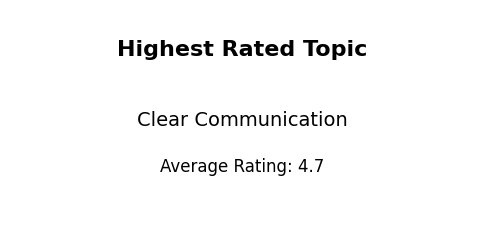

In [92]:
# Example usage

create_highest_rated_topic_kpi(df)


In [87]:
import pandas as pd
import matplotlib.pyplot as plt

def get_highest_rated_topic(data):
    """
    Returns the highest rated topic based on the overall average rating.

    Parameters:
    data (DataFrame): A pandas DataFrame containing the columns 'Topic' and 'Rating'.

    Returns:
    str, float: The highest rated topic and its average rating.
    """
    # Calculate the average rating for each topic
    topic_avg_rating = data.groupby('Topic')['Rating'].mean().reset_index()

    # Get the topic with the highest average rating
    highest_rated_topic = topic_avg_rating.loc[topic_avg_rating['Rating'].idxmax()]

    return highest_rated_topic['Topic'], round(highest_rated_topic['Rating'], 2)

print(get_highest_rated_topic(df))
# # Get the highest rated topic and its average rating
# topic, rating = get_highest_rated_topic(data)

# # Create the KPI metric card using Matplotlib
# fig, ax = plt.subplots(figsize=(6, 3))
# ax.axis('off')

# # Title
# ax.text(0.5, 0.8, 'Highest Rated Topic', fontsize=16, fontweight='bold', ha='center')

# # Topic
# ax.text(0.5, 0.5, topic, fontsize=14, ha='center')

# # Rating
# ax.text(0.5, 0.3, f'Average Rating: {rating}', fontsize=12, ha='center')

# # Save the figure
# #fig_path = 'kpi_metric_card.png'
# #plt.savefig(fig_path, bbox_inches='tight')

# # Display the figure
# plt.show()


('Clear Communication', 4.7)


In [88]:
import pandas as pd
import matplotlib.pyplot as plt

def create_highest_rated_topic_kpi(data):
    """
    Finds the highest rated topic based on the overall average rating and plots a KPI text card with the value underneath it.

    Parameters:
    data (DataFrame): A pandas DataFrame containing the columns 'Topic' and 'Rating'.

    Returns:
    None
    """
    # Calculate the average rating for each topic
    topic_avg_rating = data.groupby('Topic')['Rating'].mean().reset_index()

    # Get the topic with the highest average rating
    highest_rated_topic = topic_avg_rating.loc[topic_avg_rating['Rating'].idxmax()]
    topic = highest_rated_topic['Topic']
    rating = round(highest_rated_topic['Rating'], 2)

    # Create the KPI metric card using Matplotlib
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.axis('off')

    # Title
    ax.text(0.5, 0.8, 'Highest Rated Topic', fontsize=16, fontweight='bold', ha='center')

    # Topic
    ax.text(0.5, 0.5, topic, fontsize=14, ha='center')

    # Rating
    ax.text(0.5, 0.3, f'Average Rating: {rating}', fontsize=12, ha='center')

    # Save the figure to a file
    fig_path = 'highest_rated_topic_kpi.png'
    plt.savefig(fig_path, bbox_inches='tight')

    # Display the file path
    print(f'Figure saved to {fig_path}')

# Example usage
data = pd.DataFrame({
    'Topic': ['Coverage', 'Preauthorization', 'Customer Service'],
    'Rating': [4.5, 4.2, 4.8]
})
create_highest_rated_topic_kpi(data)


Figure saved to highest_rated_topic_kpi.png


# TOPICS BUBBLE CHART

In [149]:
import plotly.express as px
import pandas as pd

def create_bubble_chart(filtered_df):
    """
    Creates a bubble chart for topic analysis with average rating vs. review count.

    Parameters:
    filtered_df (pd.DataFrame): A DataFrame containing the data with columns 'Topic', 'Rating', and 'Customer_ID_Reviews'.

    Returns:
    fig_bubble (plotly.graph_objs._figure.Figure): The Plotly figure object representing the bubble chart.

    The bubble chart displays the average rating and review count for each topic. 
    Topics are categorized into 'Negative', 'Neutral', and 'Positive' based on the average rating. 
    The size of the bubbles corresponds to the number of reviews, and colors indicate the rating category.
    """
    # Bubble Chart: Topics
    topic_data = filtered_df.groupby('Topic').agg({
        'Rating': 'mean',
        'Customer_ID_Reviews': 'count'
    }).reset_index()

    topic_data.columns = ['Topic', 'Average_Rating', 'Review_Count']

    def get_color_category(rating):
        if rating < 2.5:
            return 'Negative'
        elif 2.5 <= rating < 4:
            return 'Neutral'
        else:  # rating >= 4
            return 'Positive'

    topic_data['Color_Category'] = topic_data['Average_Rating'].apply(get_color_category)

    color_map_bubble = {
        'Negative': '#87CEFA',  # Light Sky Blue
        'Neutral': '#E6E6FA',   # Light Purple
        'Positive': '#9370DB'   # Medium Purple
    }

    fig_bubble = px.scatter(topic_data, 
                            x='Topic', 
                            y='Average_Rating', 
                            size='Review_Count', 
                            color='Color_Category',
                            color_discrete_map=color_map_bubble,
                            hover_name='Topic',
                            size_max=60,
                            title='Topic Analysis: Average Rating vs Review Count')

    fig_bubble.update_layout(
        xaxis_title='Topics',
        yaxis_title='Average Rating',
        xaxis={'categoryorder':'total descending'},
        legend_title_text='Rating Category'
    )

    fig_bubble.update_traces(
        hovertemplate='<b>%{hovertext}</b><br>Average Rating: %{y:.2f}<br>Review Count: %{marker.size}<br>Category: %{color}'
    )

    fig_bubble.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')), selector=dict(mode='markers'))
    fig_bubble.update_xaxes(tickangle=45)
    
    return fig_bubble


In [150]:

# Usage example
fig = create_bubble_chart(df)
fig.show()


# QUARTERLY AVG RATING LINE CHART

In [153]:
import plotly.express as px
import pandas as pd

def create_time_series_chart(filtered_df):
    """
    Creates a time series chart for average rating over time.

    Parameters:
    filtered_df (pd.DataFrame): A DataFrame containing the data with columns 'Review_Date' and 'Rating'.

    Returns:
    fig_time (plotly.graph_objs._figure.Figure): The Plotly figure object representing the time series chart.

    The time series chart displays the average rating over time, with markers and lines for each quarter. 
    Quarters are formatted for better readability on the x-axis and tooltips.
    """
    # Time Series: Average Rating Over Time
    filtered_df['Quarter'] = pd.PeriodIndex(filtered_df['Review_Date'], freq='Q').astype(str)
    time_series = filtered_df.groupby('Quarter')['Rating'].mean().reset_index()

    # Function to format quarters for x-ticks and tooltips
    def format_quarters(quarter_str):
        if 'Q' in quarter_str:
            year, quarter = quarter_str.split('Q')
            return f'Q{quarter}-{year}'
        else:
            return quarter_str

    # Create a list of all ticks and a list of Q1 ticks
    all_ticks = time_series['Quarter'].tolist()
    q1_ticks = [tick for tick in all_ticks if tick.endswith('Q1')]

    # Format quarters for x-axis and tooltips
    time_series['Formatted_Quarter'] = time_series['Quarter'].apply(format_quarters)

    fig_time = px.scatter(time_series, x='Quarter', y='Rating', 
                          title='Average Rating Over Time',
                          labels={'Quarter': 'Time Period', 'Rating': 'Average Rating'},
                          hover_data={'Quarter': False, 'Formatted_Quarter': True, 'Rating': ':.2f'})
    fig_time.update_traces(mode='lines+markers')
    fig_time.update_layout(
        xaxis=dict(
            tickmode='array',
            tickvals=q1_ticks,
            ticktext=[format_quarters(q) for q in q1_ticks],
            tickangle=-45,
            showgrid=False
        ),
        yaxis=dict(showgrid=True)
    )

    # Add vertical lines for Q1 ticks
    for tick in q1_ticks:
        fig_time.add_vline(x=tick, line_width=1, line_dash="solid", line_color="lightgrey")

    # Customize hover template
    fig_time.update_traces(
        hovertemplate="<b>%{customdata[0]}</b><br>Rating: %{y:.2f}<extra></extra>"
    )
    
    return fig_time

# Usage example
# fig = create_time_series_chart(filtered_df)
# fig.show()


In [154]:

# Usage example
fig = create_time_series_chart(df)
fig.show()


# HEAT MAPS

## Demographic Heat Map

In [160]:
import plotly.express as px
import pandas as pd

def create_heatmap_chart(filtered_df):
    """
    Creates a heatmap chart for average rating by gender and age group.

    Parameters:
    filtered_df (pd.DataFrame): A DataFrame containing the data with columns 'Age_Group', 'Gender', and 'Rating'.

    Returns:
    fig_heatmap (plotly.graph_objs._figure.Figure): The Plotly figure object representing the heatmap chart.

    The heatmap chart displays the average rating categorized by gender and age group.
    """
    # Heatmap: Average Rating by Gender and Age Group
    heatmap_data = filtered_df.pivot_table(values='Rating', index='Age_Group', columns='Gender', aggfunc='mean')
    fig_heatmap = px.imshow(heatmap_data, 
                            color_continuous_scale=px.colors.sequential.Purples,
                            title='Avg Rating by Gender & Age Group')
    return fig_heatmap




In [161]:
# Usage example
fig = create_heatmap_chart(df)
# st.plotly_chart(fig, use_container_width=True)

fig.show()

In [187]:
def create_heatmap_chart(filtered_df):
    """
    Creates a heatmap chart for average rating by gender and age group.

    Parameters:
    filtered_df (pd.DataFrame): A DataFrame containing the data with columns 'Age_Group', 'Gender', and 'Rating'.

    Returns:
    fig_heatmap (plotly.graph_objs._figure.Figure): The Plotly figure object representing the heatmap chart.

    The heatmap chart displays the average rating categorized by gender and age group.
    """
    # Heatmap: Average Rating by Gender and Age Group
    heatmap_data = filtered_df.pivot_table(values='Rating', index='Age_Group', columns='Gender', aggfunc='mean')
    fig_heatmap = px.imshow(heatmap_data, 
                            color_continuous_scale=px.colors.sequential.Purples,
                            title='Demo Heatmap')
    
    # Remove whitespace and make the title closer to the chart
    fig_heatmap.update_layout(
        margin=dict(l=40, r=20, t=40, b=40),
        title=dict(
            y=.95,
            x=0.47,
            xanchor='center',
            yanchor='top'
        ),
        coloraxis_showscale=False,  # Removes the color scale legend
        xaxis_title=None,  # Removes the 'Gender' label
        yaxis_title=None   # Removes the 'Age_Group' label
    )

    # Add labels inside the heatmap
    fig_heatmap.update_traces(
        texttemplate='%{z:.2f}',
        textfont=dict(color='black'),
        hovertemplate=None
    )
    
    return fig_heatmap

In [188]:
# Usage example
fig = create_heatmap_chart(df)
# st.plotly_chart(fig, use_container_width=True)

fig.show()

## REGION & TOPICS HEATMAP

In [162]:
import plotly.express as px
import pandas as pd

def create_region_topic_heatmap(filtered_df):
    """
    Creates a heatmap chart for average rating by region and topic.

    Parameters:
    filtered_df (pd.DataFrame): A DataFrame containing the data with columns 'Region', 'Topic', and 'Rating'.

    Returns:
    fig_heatmap (plotly.graph_objs._figure.Figure): The Plotly figure object representing the heatmap chart.

    The heatmap chart displays the average rating categorized by region and topic.
    """
    # Heatmap: Average Rating by Region and Topic
    heatmap_data = filtered_df.pivot_table(values='Rating', index='Region', columns='Topic', aggfunc='mean')
    fig_heatmap = px.imshow(heatmap_data, 
                            color_continuous_scale=px.colors.sequential.Purples,
                            title='Average Rating by Region and Topic')
    return fig_heatmap



In [163]:
# Usage example
fig = create_region_topic_heatmap(df)
# st.plotly_chart(fig, use_container_width=True)
fig.show()

## REGION & PLAN TYPE HEATMAP

In [189]:
import plotly.express as px
import pandas as pd

def create_region_heatmap_chart(filtered_df):
    """
    Creates a heatmap chart for average rating by plan type and region.

    Parameters:
    filtered_df (pd.DataFrame): A DataFrame containing the data with columns 'Region', 'Plan_Type', and 'Rating'.

    Returns:
    fig_heatmap (plotly.graph_objs._figure.Figure): The Plotly figure object representing the heatmap chart.

    The heatmap chart displays the average rating categorized by plan type and region.
    """
    # Heatmap: Average Rating by Plan Type and Region
    heatmap_data = filtered_df.pivot_table(values='Rating', index='Region', columns='Plan_Type', aggfunc='mean')
    fig_heatmap = px.imshow(heatmap_data, 
                            color_continuous_scale=px.colors.sequential.Purples,
                            title='Demo Heatmap')
    
    # Remove whitespace and make the title closer to the chart
    fig_heatmap.update_layout(
        margin=dict(l=40, r=20, t=40, b=40),
        title=dict(
            y=0.95,
            x=0.5,
            xanchor='center',
            yanchor='top'
        ),
        coloraxis_showscale=False,  # Removes the color scale legend
        xaxis_title=None,  # Removes the 'Plan_Type' label
        yaxis_title=None   # Removes the 'Region' label
    )

    # Add labels inside the heatmap
    fig_heatmap.update_traces(
        texttemplate='%{z:.2f}',
        textfont=dict(color='black'),
        hovertemplate=None
    )
    
    return fig_heatmap



In [190]:
# Usage example
fig = create_region_heatmap_chart(df)
fig.show()


# STATES AVG RATING TABLE

In [164]:
import streamlit as st
import pandas as pd

def display_top_states(filtered_df):
    """
    Displays a dataframe with top states and their average ratings in Streamlit.

    Parameters:
    filtered_df (pd.DataFrame): A DataFrame containing the data with columns 'State' and 'Rating'.

    Returns:
    None

    The function groups the data by state, calculates the average rating, and displays a styled dataframe with columns for state and rating.
    """
    # Group by state and calculate mean rating
    states_ratings_df = filtered_df.groupby('State')['Rating'].mean().reset_index()

    # Determine the maximum rating for the progress column configuration
    max_rating = states_ratings_df['Rating'].max()

    st.markdown('#### Top States')

    st.dataframe(states_ratings_df,
                 column_order=("State", "Rating"),
                 hide_index=True,
                 width=None,
                 column_config={
                    "State": st.column_config.TextColumn(
                        "State",
                    ),
                    "Rating": st.column_config.ProgressColumn(
                        "Rating",
                        format="%f",
                        min_value=0,
                        max_value=max_rating,
                     )}
                 )



In [166]:
# Usage example
display_top_states(df)
